<img align="left" src="https://github.com/GarethSequeira/Customer-Segmentation/blob/main/CustomerSegmentation/Images/CustomerRect.png?raw=true" width="100%">

<br><br>

# Customer Segmenatation
### Customer segmentation is done in order to find various customer bases. 
### Customers can be divied into groups based on characteristics like gender, age, interests, and spending habits so as to market to each specific customer base effectively.

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading Dataset

df = pd.read_csv("CustomerData.csv")

<br><br>

## Exploratory Data Analysis

In [3]:
# Returns Rows and Columns in the Dataset

df.shape

(200, 5)

In [4]:
# Returns List of Column Headings 

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
# Returns Datatypes for Each Column

df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# Returns the first x number of rows when head(x)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Returns the last x number of rows when tail(x).

df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
# Returns basic information of all Columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Returns Statistics for Numeric Columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
# Checking for null values
# Returns true for a column having null values, else false

df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

<br><br>

## Data Cleaning

In [11]:
# Creating Dataframe

df_copy = df.copy(deep=True)

In [12]:
df_copy.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [13]:
# Dropping the column of 'CustomerID' as it does not provide any value

df_copy.drop('CustomerID', axis=1, inplace=True)
df_copy.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<br><br>

## Data Visualization

In [14]:
df_copy.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

### • Gender Plot

Text(0, 0.5, 'Count')

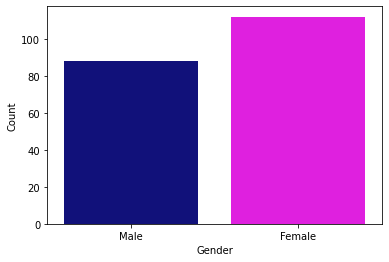

In [15]:
# Visualising Gender

sns.countplot(x='Gender', data=df_copy, palette=["darkblue", "magenta"])
plt.xlabel('Gender')
plt.ylabel('Count')

#### Observation: Gender Plot
From the Count plot it is observed that the number of Female customers are more that the total number of Male customers.

### • Age Plot

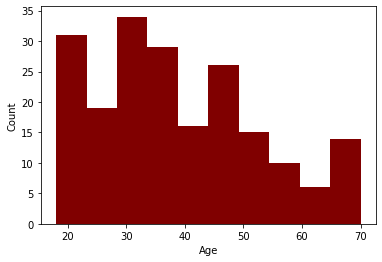

In [16]:
# Visualising Age

plt.hist(x=df_copy['Age'], bins=10, orientation='vertical', color='maroon')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Observation: Age
From the Histogram it is evident that there are 3 age groups that are more frequently shop at the mall, they are: 15-22 years, 30-40 years and 45-50 years.

### • Age v Spending Score

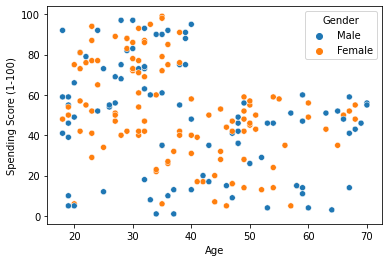

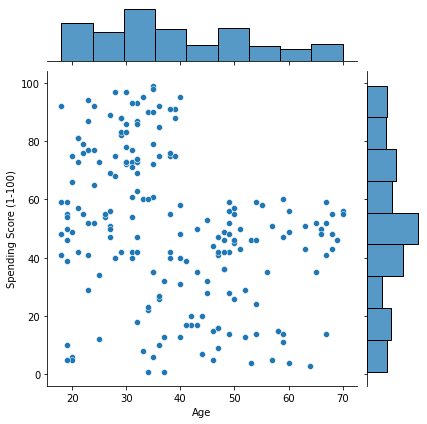

In [17]:
# Visualising Age against Spending Score

sns.scatterplot(data=df_copy, x='Age', y='Spending Score (1-100)', hue='Gender')
sns.jointplot(data=df_copy, x='Age', y='Spending Score (1-100)')

#### Observation: Age v Spending Score

Customers whose spending score is more than 65 have their Age in the range of 15-42 years. Also from the Scatter plot it is observed that customers whose spending score is more than 65 consists of more Females than Males.

Customers having average spending score ie: in the range of 40-60 consists of age group of the range 15-75 years and the count of Male and Female in this age group is also approximatly the same.


### • Annual Income v Spending Score

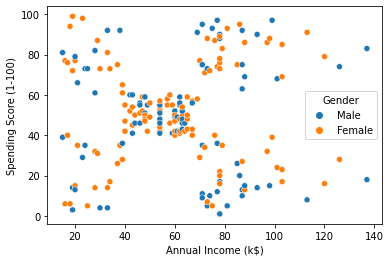

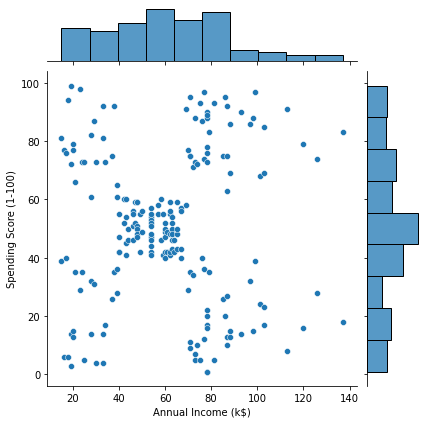

In [18]:
# Visualising Annual Income v Spending Score 

sns.scatterplot(data=df_copy, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
sns.jointplot(data=df_copy, x='Annual Income (k$)', y='Spending Score (1-100)')

#### Observation: Annual Income v Spending Score

#### 5 clusters and can be seen:
#### They can be categorised as:

    1. High Income, High Spending Score (Top Right Cluster)
    2. High Income, Low Spending Score (Bottom Right Cluster)
    3. Average Income, Average Spending Score (Center Cluster)
    4. Low Income, High Spending Score (Top Left Cluster)
    5. Low Income, Low Spending Score (Bottom Left Cluster)

<br><br>

## Data Preprocessing

In [19]:
# Clustering via Features of Annual Income v Spending Score

X = df_copy.iloc[:, [2,3]]

In [20]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

### Finding Optimal Number of Clusters using Elbow Method

In [21]:
# Calculating WCSS values for 1 to 10 clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_model.fit(X)
  wcss.append(kmeans_model.inertia_)

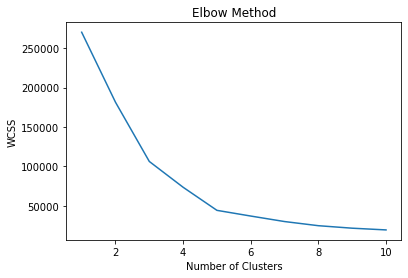

In [22]:
# Plotting the WCSS values

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Observation:
All **5 clusters** are optimal for the given dataset.

<br><br>

## Feature Scaling
Feature Scaling is performed because KMeans uses Distance (Euclidean, Manhattan, etc.) and the model perfoms faster on scaling the values

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

<br><br>


## Model Building

In [24]:
# Training the KMeans model with n_clusters=5

kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(X)

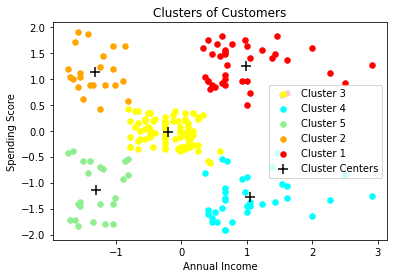

In [25]:
# Visualising Clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'lightgreen', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'orange', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()

plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Observations: Clustering

#### 🔴Cluster 1: High Income, High Spending Score

#### 🟠Cluster 2:High Income, Low Spending Score Cluster

#### 🟡Cluster 3: Average Income, Average Spending Score

#### 🔵Cluster 4: Low Income, High Spending Score

#### 🟢Cluster 5: Low Income, Low Spending Score

<br><br>

## Conclusions

#### 🔴Customers belonging to Cluster 1:
Loyal customers through which major revenue from the mall is generated with thier help. Product and sale alerts can be given to keep then enthusiastic and maintain income via thier shopping.
<br>
#### 🟠Customers belonging to Cluster 2: 
These customers can be made to feel more valued by asking the feedback and advertising the product in a better way to convert them into Cluster 5 customers.
<br>
#### 🟡Customers belonging to Cluster 3: 
These set of customers can be targeted by giving them various kinds of offers.
<br>
#### 🔵Customers belonging to Cluster 4: 
Average spending customers may or may not be targeted depending on the mall.
<br>
#### 🟢Customers belonging to Cluster 5:
Need not be targated as these customers have less income and wont spend alot of money.

___